<a href="https://colab.research.google.com/github/pahrul23/Belajar-Room-Db-Mobile/blob/main/PERCOBAAN_2_SKRIPSI_PAHRUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load** **dan** **Preprocessing** **Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
import numpy as np
import pandas as pd

In [83]:
df = pd.read_csv('drive/MyDrive/Wira/labelV1.csv')
df.dropna(inplace=True)
df.isnull().sum()
df

,label,filtered,cleaned,content_tokens,normalisasi
0,1.0,mantap,mantap,['mantap'],['mantap']
1,-1.0,kenapa saya ditagih hutang kan saya di tolak p...,kenapa saya tagih hutang saya tolak pinjam man...,"['kenapa', 'saya', 'tagih', 'hutang', 'saya', ...","['kenapa', 'aku', 'tagih', 'hutang', 'aku', 't..."
2,1.0,sangat bagus,sangat bagus,"['sangat', 'bagus']","['sangat', 'bagus']"
3,1.0,bagus,bagus,['bagus'],['bagus']
4,1.0,ini pengajuan pertama moga di acc krn lg butuh...,aju pertama moga acc lg butuh dana kembang war...,"['aju', 'pertama', 'moga', 'acc', 'lg', 'butuh...","['aju', 'pertama', 'semoga', 'terima', 'lagi',..."
...,...,...,...,...,...
17636,-1.0,ada kami ngentod,ada kami ngentod,"['ada', 'kami', 'ngentod']","['ada', 'kami', 'ngentod']"
17637,-1.0,waktu jatuh tempo masih hari tapi panggilan ma...,jatuh tempo masih hari tapi panggil masuk tagi...,"['jatuh', 'tempo', 'masih', 'hari', 'tapi', 'p...","['jatuh', 'tempo', 'masih', 'hari', 'tapi', 'p..."
17638,-1.0,pelayanan dan csnya buruk blum waktunya byar s...,layan csnya buruk blum waktu byar sdah tagih k...,"['layan', 'csnya', 'buruk', 'blum', 'waktu', '...","['layan', 'csnya', 'buruk', 'blum', 'waktu', '..."
17639,-1.0,aplikasi busuk baru daftar udah di tolak penga...,aplikasi busuk baru daftar udah tolak aju pinj...,"['aplikasi', 'busuk', 'baru', 'daftar', 'udah'...","['aplikasi', 'busuk', 'baru', 'daftar', 'sudah..."


In [ ]:
# df = pd.DataFrame(df[['User','Score', 'Content']])
# df.tail(10)

In [84]:
df['label'] = df['label'].replace([-1], '1') #Pos = 2
df['label'] = df['label'].replace([0], '0') #Neutral = 1
df['label'] = df['label'].replace([1], '2') #Negative = 0

In [85]:
df['label'].value_counts()

2    7753
1    7707
0    2056
Name: label, dtype: int64

In [86]:
#split dataset kedalam data train dan test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.filtered, df.label,
                                                    test_size=0.2, random_state=15)


In [87]:
#pembobotan kata using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_train = x_train.toarray()
# np.array(x_train)
print(x_train)

x_test = vect.transform(x_test)
x_test = x_test.toarray()
# np.array(x_test)
print(x_test)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [88]:
#ubah data kedalam bentuk array
y_train = np.array(y_train)
y_test = np.array(y_test)

# **Random** **Forest**

In [9]:
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []
    
    def fit(self, X, y):
        np.random.seed(self.random_state)
        for i in range(self.n_estimators):
            # bootstrap sample
            idx = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            X_boot, y_boot = X[idx], y[idx]
            
            # train decision tree
            dt = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            dt.fit(X_boot, y_boot)
            
            # save tree
            self.trees.append(dt)
    
    def predict(self, X):
        # make predictions for each tree
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # calculate mode (most frequent class) for each sample
        return np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=predictions)

In [10]:
RandomForest = RandomForestClassifier(n_estimators=200, max_depth=13, min_samples_split=2, random_state=42)
RandomForest.fit(x_train, y_train)

y_pred = RandomForest.predict(x_test)

acc = np.mean(y_pred == y_test)
print("Accuracy:", acc)

Accuracy: 0.7280251141552512


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))
print("Random Forest Precision: ", precision_score(y_test, y_pred,  average='weighted'))
print("Random Forest Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("Random Forest f1_score: ", f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

Random Forest Accuracy:  0.7280251141552512
Random Forest Precision:  0.7333683266072824
Random Forest Recall:  0.7280251141552512
Random Forest f1_score:  0.7038460241666706
              precision    recall  f1-score   support

           0       0.54      0.13      0.21       403
           1       0.85      0.70      0.77      1585
           2       0.66      0.91      0.77      1516

    accuracy                           0.73      3504
   macro avg       0.68      0.58      0.58      3504
weighted avg       0.73      0.73      0.70      3504



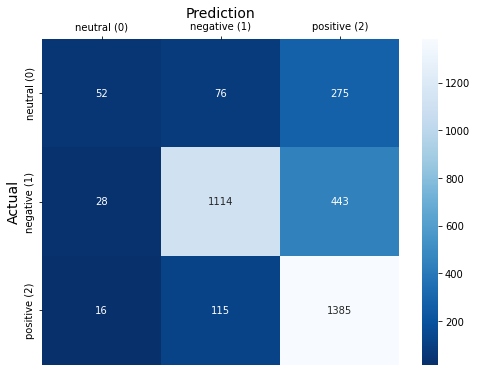

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True,  cmap='Blues_r')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14),
ax.set_xticklabels([ 'neutral (0)','negative (1)', 'positive (2)' ])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels([ 'neutral (0)','negative (1)', 'positive (2)'] )
plt.show()

# **XGBoost**

In [92]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Convert y_train to integer values
y_train = pd.Series(y_train).astype(int)

# Convert y_test to integer values
y_test = pd.Series(y_test).astype(int)

# Train the classifier on the training set
xgb_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the XGBoost classifier
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the accuracy
print("Accuracy:", acc_xgb)

Accuracy: 0.8279109589041096


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='macro')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print('XGBoost Accuracy:', accuracy)
print('XGBoost Precision:', precision)
print('XGBoost Recall:', recall)
print('XGBoost F1-score:', f1)

print(classification_report(y_test,  y_pred_xgb))

XGBoost Accuracy: 0.8279109589041096
XGBoost Precision: 0.819753096283817
XGBoost Recall: 0.7157414864325554
XGBoost F1-score: 0.8187540116088882
              precision    recall  f1-score   support

           0       0.64      0.37      0.47       403
           1       0.88      0.87      0.87      1585
           2       0.81      0.90      0.85      1516

    accuracy                           0.83      3504
   macro avg       0.77      0.72      0.73      3504
weighted avg       0.82      0.83      0.82      3504



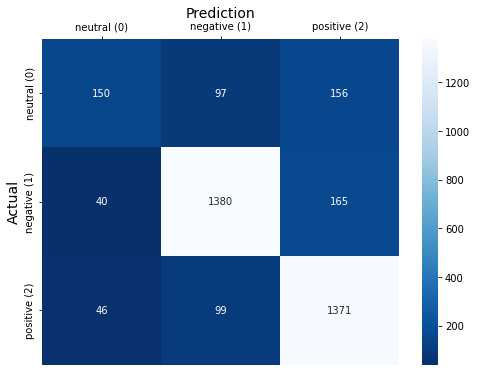

In [100]:
confusion_matrix(y_test, y_pred_xgb)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred_xgb), fmt = 'g', annot = True,   cmap='Blues_r')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14),
ax.set_xticklabels([ 'neutral (0)','negative (1)', 'positive (2)' ])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels([ 'neutral (0)','negative (1)', 'positive (2)'] )
plt.show()

# **SVM**

In [20]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder

In [21]:
def projection_simplex(v, z=1):
    """
    Projection onto the simplex:
        w^* = argmin_w 0.5 ||w-v||^2 s.t. \sum_i w_i = z, w_i >= 0
    """
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w

In [22]:
class MulticlassSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1, max_iter=50, tol=0.05, kernel='linear',
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.kernel = kernel
        self.random_state = random_state
        self.verbose = verbose
    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        if self.kernel == 'linear':
            g = np.dot(X[i], self.coef_.T) + 1
        elif self.kernel == 'rbf':
            # compute RBF kernel
            K = np.exp(-self.gamma * np.sum((X - X[i])**2, axis=1))
            g = np.dot(K, self.dual_coef_.T) + 1
        g[y[i]] -= 1
        return g
    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue
            smallest = min(smallest, g[k])
        return g.max() - smallest
    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]
        # Compute projection onto the simplex.
        beta = projection_simplex(beta_hat, z)
        return Ci - self.dual_coef_[:, i] - beta / norms[i]
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Normalize labels.
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)
        # Initialize primal and dual coefficients.
        n_classes = len(self._label_encoder.classes_)
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))
        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))
        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)
        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0
            for ii in range(n_samples):
                i = ind[ii]
                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue
                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v
                if v < 1e-12:
                    continue
                delta = self._solve_subproblem(g, y, norms, i)
                self.coef_ += (delta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += delta
            if it == 0:
                violation_init = violation_sum
            vratio = violation_sum / violation_init
            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break
        return self
    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        pred = decision.argmax(axis=1)
        return self._label_encoder.inverse_transform(pred)

In [24]:
svm = MulticlassSVM(C=1, tol=0.01, max_iter=100, random_state=0, verbose=1)
svm.fit(x_train, y_train)

print(svm.score(x_train, y_train))

Converged
0.9232086782757636


In [26]:
print(svm.score(x_test, y_test))

0.8478881278538812


In [27]:
hasil = svm.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("SVM Accuracy: ", accuracy_score(y_test, hasil))
print("SVM Precision: ", precision_score(y_test, hasil, average='weighted'))
print("SVM Recall: ", recall_score(y_test, hasil, average='weighted'))
print("SVM f1_score: ", f1_score(y_test, hasil, average='weighted'))

print(classification_report(y_test, hasil, zero_division=0))

SVM Accuracy:  0.8478881278538812
SVM Precision:  0.8431819557846607
SVM Recall:  0.8478881278538812
SVM f1_score:  0.8451721938373905
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       403
           1       0.88      0.90      0.89      1585
           2       0.88      0.89      0.88      1516

    accuracy                           0.85      3504
   macro avg       0.78      0.76      0.77      3504
weighted avg       0.84      0.85      0.85      3504



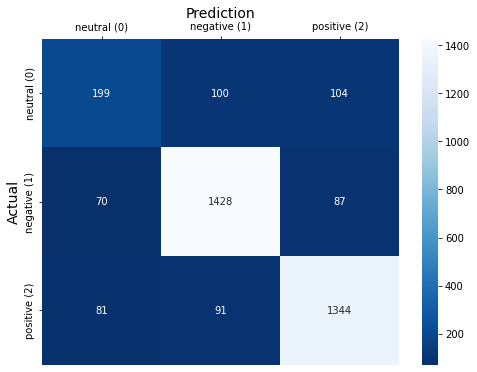

In [31]:
confusion_matrix(y_test, hasil)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = hasil), fmt = 'g', annot = True,   cmap='Blues_r')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14),
ax.set_xticklabels([ 'neutral (0)','negative (1)', 'positive (2)' ])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels([ 'neutral (0)','negative (1)', 'positive (2)'] )
plt.show()

# **Train** **Model** **For** **Soft** **Voting**

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(x_test)

In [109]:
# from sklearn.metrics import accuracy_score

# # Calculate the accuracy of the Random Forest classifier
# acc_rf = accuracy_score(y_test, y_pred_rf)

# # Print the accuracy
# print("Accuracy:", acc_rf)

In [72]:
from sklearn import svm

svm = svm.SVC(class_weight=None, C=10, gamma=0.001, kernel='linear', random_state=0, probability=True)
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

In [110]:
# from sklearn.metrics import accuracy_score

# # Calculate the accuracy of the SVM classifier
# acc_svm = accuracy_score(y_test, y_pred_svm)

# # Print the accuracy
# print("Accuracy:", acc_svm)

In [108]:
# Implementasi bobot ke model soft voting
ensemble = (0.66254731 * rf.predict_proba(x_test) + 0.03024712 * xgb_clf.predict_proba(x_test) + 0.30720557 * svm.predict_proba(x_test))
y_pred = np.argmax(ensemble, axis=1)
print("Akurasi Soft Voting dengan bobot terbaik:", accuracy_score(y_test, y_pred))

Akurasi Soft Voting dengan bobot terbaik: 0.8458904109589042


In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

print("Soft Voting Accuracy: ", accuracy_score(y_test, y_pred))
print("Soft Voting Precision: ", precision_score(y_test, y_pred,  average='weighted'))
print("Soft Voting Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("Soft Voting f1_score: ", f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

Soft Voting Accuracy:  0.8458904109589042
Soft Voting Precision:  0.8391957280373116
Soft Voting Recall:  0.8458904109589042
Soft Voting f1_score:  0.8373934604124236
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       403
           1       0.84      0.93      0.88      1585
           2       0.89      0.87      0.88      1516

    accuracy                           0.85      3504
   macro avg       0.80      0.74      0.76      3504
weighted avg       0.84      0.85      0.84      3504



# **Prediksi** **Dataset** **Baru**

In [75]:
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/indodanaPrediksi.csv')
df.dropna(inplace=True)
df.isnull().sum()
df

,userName,score,at,content
0,Rhegita Arrum Syafitri,5,2023-03-23 13:39:52,bagusss
1,Yusmanda Asmara,4,2023-03-23 13:30:36,mantap
2,tomi tulus,3,2023-03-23 13:24:14,Untuk saat ini kasih 3 bintang dlu. kalau udah...
3,Ariscaryana Ryana,3,2023-03-23 13:16:46,semoga d ACC ya
4,LYANDIJAYAMAULANA,5,2023-03-23 13:16:18,Saya pinjam 8 jta kok cair nya 5 jta saya mau ...
...,...,...,...,...
9995,Imam Bukhori,5,2023-02-26 17:23:10,mantaf
9996,Tisna Joe,5,2023-02-26 17:21:05,mudah dan cepat
9997,Gabriella Wibowo,5,2023-02-26 17:19:57,Bagus
9998,PRIVATE NUMBER,5,2023-02-26 17:19:08,semoga bisa membantu


In [ ]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['content'] = df['content'].apply(lambda x: x.lower())
df['content'] = df['content'].apply(lambda x: remove_punctuations(x))

In [ ]:
df

,userName,score,at,content
0,Rhegita Arrum Syafitri,5,2023-03-23 13:39:52,bagusss
1,Yusmanda Asmara,4,2023-03-23 13:30:36,mantap
2,tomi tulus,3,2023-03-23 13:24:14,untuk saat ini kasih 3 bintang dlu kalau udah ...
3,Ariscaryana Ryana,3,2023-03-23 13:16:46,semoga d acc ya
4,LYANDIJAYAMAULANA,5,2023-03-23 13:16:18,saya pinjam 8 jta kok cair nya 5 jta saya mau ...
...,...,...,...,...
9995,Imam Bukhori,5,2023-02-26 17:23:10,mantaf
9996,Tisna Joe,5,2023-02-26 17:21:05,mudah dan cepat
9997,Gabriella Wibowo,5,2023-02-26 17:19:57,bagus
9998,PRIVATE NUMBER,5,2023-02-26 17:19:08,semoga bisa membantu


In [ ]:
test = df['content']
time = df['at']
rating = df['score']

In [ ]:
test = [str (item) for item in test]
test = vect.transform(test)
test = test.toarray()

In [ ]:
pred_test_rf = rf.predict(test)

In [ ]:
sentiment = pd.Series(pred_test, name='sentimentRF')

In [ ]:
# menggabungkan dataframe dan series
df = pd.concat([df, sentiment], axis=1)

In [ ]:
df

,userName,score,at,content,sentimentRF
0,Rhegita Arrum Syafitri,5,2023-03-23 13:39:52,bagusss,2
1,Yusmanda Asmara,4,2023-03-23 13:30:36,mantap,2
2,tomi tulus,3,2023-03-23 13:24:14,untuk saat ini kasih 3 bintang dlu kalau udah ...,2
3,Ariscaryana Ryana,3,2023-03-23 13:16:46,semoga d acc ya,2
4,LYANDIJAYAMAULANA,5,2023-03-23 13:16:18,saya pinjam 8 jta kok cair nya 5 jta saya mau ...,2
...,...,...,...,...,...
9995,Imam Bukhori,5,2023-02-26 17:23:10,mantaf,2
9996,Tisna Joe,5,2023-02-26 17:21:05,mudah dan cepat,2
9997,Gabriella Wibowo,5,2023-02-26 17:19:57,bagus,2
9998,PRIVATE NUMBER,5,2023-02-26 17:19:08,semoga bisa membantu,2


In [ ]:
pred_test_xgb = xgb_clf.predict(test)

In [ ]:
sentiment = pd.Series(pred_test_xgb, name='sentimentXGB')

In [ ]:
# menggabungkan dataframe dan series
df = pd.concat([df, sentiment], axis=1)

In [ ]:
df

,userName,score,at,content,sentimentRF,sentimentXGB
0,Rhegita Arrum Syafitri,5,2023-03-23 13:39:52,bagusss,2,2
1,Yusmanda Asmara,4,2023-03-23 13:30:36,mantap,2,2
2,tomi tulus,3,2023-03-23 13:24:14,untuk saat ini kasih 3 bintang dlu kalau udah ...,2,1
3,Ariscaryana Ryana,3,2023-03-23 13:16:46,semoga d acc ya,2,0
4,LYANDIJAYAMAULANA,5,2023-03-23 13:16:18,saya pinjam 8 jta kok cair nya 5 jta saya mau ...,2,1
...,...,...,...,...,...,...
9995,Imam Bukhori,5,2023-02-26 17:23:10,mantaf,2,2
9996,Tisna Joe,5,2023-02-26 17:21:05,mudah dan cepat,2,2
9997,Gabriella Wibowo,5,2023-02-26 17:19:57,bagus,2,2
9998,PRIVATE NUMBER,5,2023-02-26 17:19:08,semoga bisa membantu,2,2


In [ ]:
pred_test_svm = svm.predict(test)

In [ ]:
sentiment = pd.Series(pred_test_svm, name='sentimentSVM')

In [ ]:
# menggabungkan dataframe dan series
df = pd.concat([df, sentiment], axis=1)

In [ ]:
df

,userName,score,at,content,sentimentRF,sentimentXGB,sentimentSVM
0,Rhegita Arrum Syafitri,5,2023-03-23 13:39:52,bagusss,2,2,2
1,Yusmanda Asmara,4,2023-03-23 13:30:36,mantap,2,2,2
2,tomi tulus,3,2023-03-23 13:24:14,untuk saat ini kasih 3 bintang dlu kalau udah ...,2,1,2
3,Ariscaryana Ryana,3,2023-03-23 13:16:46,semoga d acc ya,2,0,0
4,LYANDIJAYAMAULANA,5,2023-03-23 13:16:18,saya pinjam 8 jta kok cair nya 5 jta saya mau ...,2,1,1
...,...,...,...,...,...,...,...
9995,Imam Bukhori,5,2023-02-26 17:23:10,mantaf,2,2,2
9996,Tisna Joe,5,2023-02-26 17:21:05,mudah dan cepat,2,2,2
9997,Gabriella Wibowo,5,2023-02-26 17:19:57,bagus,2,2,2
9998,PRIVATE NUMBER,5,2023-02-26 17:19:08,semoga bisa membantu,2,2,2


In [ ]:
ensemble = (0.66254731 * rf.predict_proba(test) + 0.03024712 * xgb_clf.predict_proba(test) + 0.30720557 * svm.predict_proba(test))
y_pred = np.argmax(ensemble, axis=1)

In [ ]:
y_pred

array([2, 2, 1, ..., 2, 2, 2])

In [ ]:
sentiment = pd.Series(y_pred, name='sentimentSV')

In [ ]:
# menggabungkan dataframe dan series
df = pd.concat([df, sentiment], axis=1)

In [ ]:
df

,userName,score,at,content,sentimentRF,sentimentXGB,sentimentSVM,sentimentSV
0,Rhegita Arrum Syafitri,5,2023-03-23 13:39:52,bagusss,2,2,2,2
1,Yusmanda Asmara,4,2023-03-23 13:30:36,mantap,2,2,2,2
2,tomi tulus,3,2023-03-23 13:24:14,untuk saat ini kasih 3 bintang dlu kalau udah ...,2,1,2,1
3,Ariscaryana Ryana,3,2023-03-23 13:16:46,semoga d acc ya,2,0,0,1
4,LYANDIJAYAMAULANA,5,2023-03-23 13:16:18,saya pinjam 8 jta kok cair nya 5 jta saya mau ...,2,1,1,1
...,...,...,...,...,...,...,...,...
9995,Imam Bukhori,5,2023-02-26 17:23:10,mantaf,2,2,2,2
9996,Tisna Joe,5,2023-02-26 17:21:05,mudah dan cepat,2,2,2,2
9997,Gabriella Wibowo,5,2023-02-26 17:19:57,bagus,2,2,2,2
9998,PRIVATE NUMBER,5,2023-02-26 17:19:08,semoga bisa membantu,2,2,2,2


In [ ]:
print(df['sentimentSVM'].value_counts())
print(df['sentimentXGB'].value_counts())
print(df['sentimentRF'].value_counts())
print(df['sentimentSV'].value_counts())

2    5545
0    2783
1    1672
Name: sentimentSVM, dtype: int64
2    5843
0    2477
1    1680
Name: sentimentXGB, dtype: int64
2    6734
1    3010
0     256
Name: sentimentRF, dtype: int64
2    5418
0    2385
1    2197
Name: sentimentSV, dtype: int64


In [ ]:
df.to_csv("drive/MyDrive/SKRIPSI/indodanaHasil.csv", index = False)